# Crimes against women in India


### This project contains the data record of all types of crime against women in india in the span of year 2001-2014. Main aim of working on this project is to reflect the situation of women in our society and raise concern about this matter.

This project is part of my Data Analysis with Python: Zero to Pandas course - www.zerotopandas.com.

In [1]:
import jovian

<IPython.core.display.Javascript object>

In [2]:
jovian.commit(project='crime-against-women', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "sathi-satb/crime-against-women" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/sathi-satb/crime-against-women


'https://jovian.ml/sathi-satb/crime-against-women'

In [3]:
!pip install pandas 
!pip install matplotlib 
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

#### Reading the csv file.

In [5]:
jovian.commit('crimes_against_women.csv')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sathi-satb/crime-against-women" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sathi-satb/crime-against-women


'https://jovian.ml/sathi-satb/crime-against-women'

In [6]:
crimes_df = pd.read_csv('crimes_against_women.csv')

In [7]:
crimes_df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Assault_for_her_modesty,Insult_to_modesty_of_Women,Domestic_violence,Importation_of_Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


#### Let us find out the number of rows and column of the particular dataset

In [8]:
crimes_df.shape

(10677, 11)

In [9]:
import jovian

In [10]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sathi-satb/crime-against-women" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sathi-satb/crime-against-women


'https://jovian.ml/sathi-satb/crime-against-women'

# Data Preparation and Cleaning

#### To start with the very basic of data cleaning, let's find out if any of the columns have any Null or missing values

In [11]:
overall_crime = crimes_df.isna().sum()

In [12]:
overall_crime

Unnamed: 0                    0
STATE/UT                      0
DISTRICT                      0
Year                          0
Rape                          0
Kidnapping_Abduction          0
Dowry_Deaths                  0
Assault_for_her_modesty       0
Insult_to_modesty_of_Women    0
Domestic_violence             0
Importation_of_Girls          0
dtype: int64

###### None of the column has any Null values.

#### Now let's find the total number of 'Unique' districts, where the crimes have been committed

In [13]:
districts = len(crimes_df.DISTRICT.unique())

In [14]:
districts

1605

#### But there are 718 districts in India, in total, which means there is messy or false datas in a huge amount, in this case, we better drop the column "District" and also "Unnamed: 0", as it is of no use, in our data analysis process.

In [15]:
crimes_df.drop(['DISTRICT', 'Unnamed: 0'], axis = 1, inplace=True)


In [16]:
crimes_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Assault_for_her_modesty,Insult_to_modesty_of_Women,Domestic_violence,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


#### Now, let's start with analysing the datas of the column "STATE/UT", for that let's find out the names of all the states/UT through .unique()

In [17]:
print(crimes_df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


#### We can see from above that there are lot many repeated datas, like some of them are repeated again by using capital letters and some of them have issues with space too, like A&N Islands and also Delhi has been repeated again by mentioning it as Delhi UT

In [18]:
# Fist we will remove all the repeated uppercase values
def remove_uppercase(r):
    r = r['STATE/UT'].strip()
    r = r.upper()
    return r
crimes_df['STATE/UT'] = crimes_df.apply(remove_uppercase, axis=1)

#Now use replace function to replace the other type of repeated datas as dicussed above
crimes_df['STATE/UT'].replace("A&N ISLANDS", "A & N ISLANDS", inplace = True)
crimes_df['STATE/UT'].replace("D&N HAVELI", "D & N HAVELI", inplace = True)
crimes_df['STATE/UT'].replace("DELHI UT", "DELHI", inplace = True)

#### Let's go through the datas now!

In [19]:
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

#### Let's check the total number of States+UT

In [20]:
len(crimes_df['STATE/UT'].unique())

36

#### Which is coming out perfect, hence we are done with our data cleaning process of our dataset

In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sathi-satb/crime-against-women" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sathi-satb/crime-against-women


'https://jovian.ml/sathi-satb/crime-against-women'

# Exploratory Analysis and Visualization

#### Let us find out the total population of women over the years, 2001-2014, who has been a victim of the crime based on their gender.

In [23]:
victims_raped = crimes_df.Rape.sum()
victims_kidnapped_abducted = crimes_df.Kidnapping_Abduction.sum()
dowery_death = crimes_df.Dowry_Deaths.sum()
modesty_assault = crimes_df.Assault_for_her_modesty.sum()
insult_to_modesty = crimes_df.Insult_to_modesty_of_Women.sum()
domestic_violence = crimes_df.Domestic_violence.sum()
girls_imported = crimes_df.Importation_of_Girls.sum()

In [24]:
total_population_of_victim_overall = victims_raped + victims_raped + dowery_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

5194570

#### This above analysis potrays a heartbreaking situation of women in our society, as more than 5 million number of females, over the years 2001-2014, have been a victim of assault, violance, rape or even death, in India alone.  

#### Now let us analyse the all the cases sepately by using bar graph. 
Note - For our ease, we are doing the analysis for six caterories, excluding the "Insult_to_modesty_of_Women" column.

Text(0, 0.5, 'Cases ofImportation of girls in India')

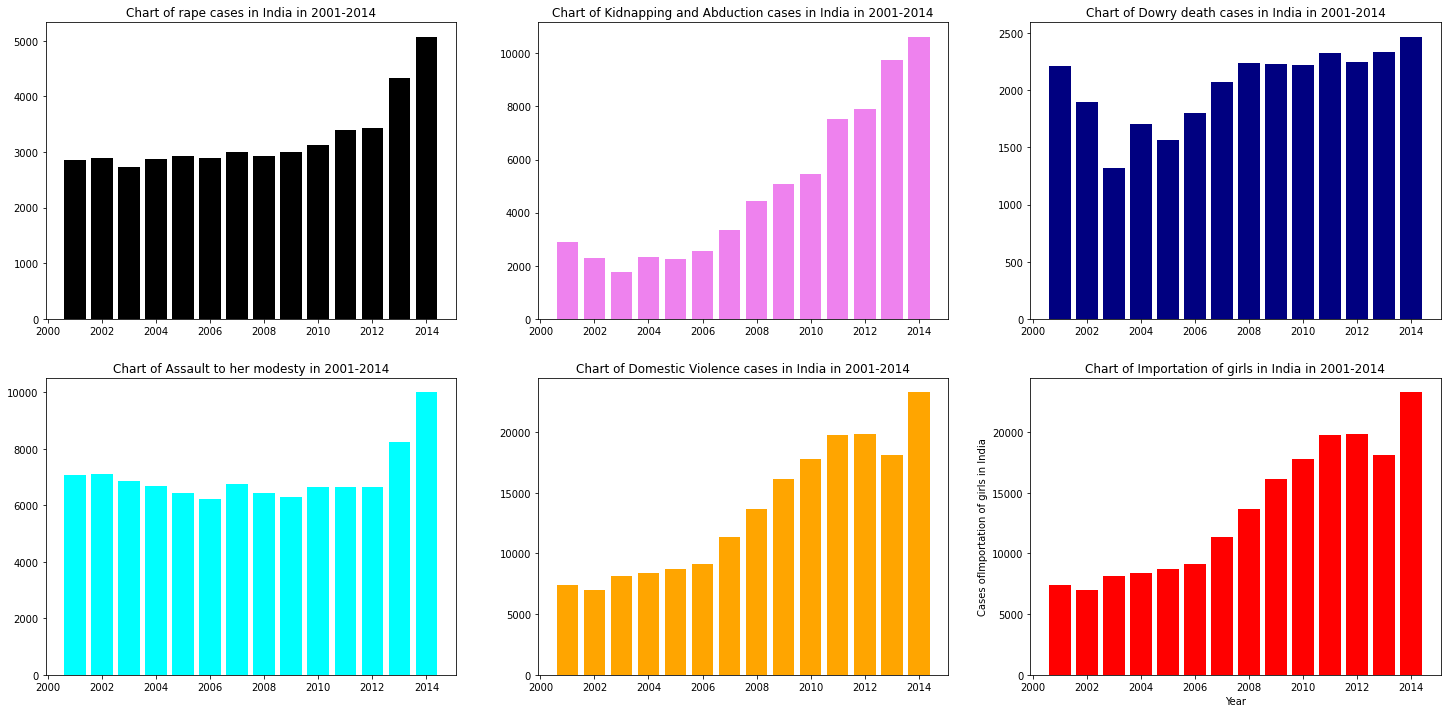

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(25, 12))

axes[0,0].set_title("Chart of rape cases in India in 2001-2014")
axes[0,0].bar(crimes_df.Year, crimes_df.Rape, color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Rape in India') #Y-axis

axes[0,1].set_title("Chart of Kidnapping and Abduction cases in India in 2001-2014")
axes[0,1].bar(crimes_df.Year, crimes_df.Kidnapping_Abduction, color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Kidnapping and Abduction in India') #Y-axis

axes[0,2].set_title("Chart of Dowry death cases in India in 2001-2014")
axes[0,2].bar(crimes_df.Year, crimes_df.Dowry_Deaths, color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Dowry deaths in India') #Y-axis

axes[1,0].set_title("Chart of Assault to her modesty in 2001-2014")
axes[1,0].bar(crimes_df.Year, crimes_df.Assault_for_her_modesty, color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Assaulting a women for her modesty in India') #Y-axis

axes[1,1].set_title("Chart of Domestic Violence cases in India in 2001-2014")
axes[1,1].bar(crimes_df.Year, crimes_df.Domestic_violence, color = 'orange');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Domestic Violence in India') #Y-axis

axes[1,2].set_title("Chart of Importation of girls in India in 2001-2014")
axes[1,2].bar(crimes_df.Year, crimes_df.Domestic_violence, color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases ofImportation of girls in India') #Y-axis

### There are two things to be concluded from the above bar chart -

####      1) The cases have incraesed over the years.

####       2) 2014 has been the year, where violance against women was reported the maximum, under each of the cases like, rape, domestic violence etc, which can also be proved below, which can also be cross examined with the code below.

In [26]:
count_df = crimes_df.groupby('Year')[['STATE/UT']].count()
count_df

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


#### Let us use seaborn to take help of heatmap to represent how more cases from each state started coming up more frequently with each passing year.

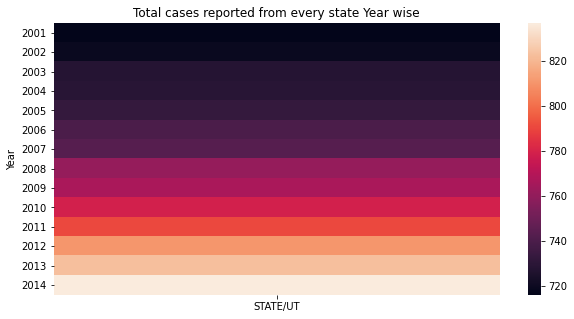

In [27]:
plt.figure(figsize=(10,5))
plt.title("Total cases reported from every state Year wise")
sns.heatmap(count_df);

### This heatmap shows how more number of state's name started appearing on the dataset, for reporting crimes and sadly the crime only increased with the passing year.

#### It gives us the conclusion that overall(cases under each category), from every state, has increased with time, not decreased.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sathi-satb/crime-against-women" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sathi-satb/crime-against-women


'https://jovian.ml/sathi-satb/crime-against-women'

# Asking and Answering Questions

### As part of this data analysis, it is very crucial to raise question and find answer to them. Here we will try to find out some of the most essential questions, that will help us in drawing a major conclusion from our dataset.

##### Note - We will be focusing on four major categories for the rest of the analysis, excluding "Assault_for_her_modesty" and "Insult_to_modesty_of_Women".

In [30]:
crimes_df = crimes_df.drop(['Assault_for_her_modesty', 'Insult_to_modesty_of_Women'], axis=1)

#### Q . Create a dataframe containing 10 highest reported rape cases in India, in the span of year 2001-2014.

In [31]:
max_rape_cases = crimes_df.sort_values('Rape', ascending = False).head(10)
max_rape_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
10244,MADHYA PRADESH,2014,5076,5688,733,6451,0
9426,MADHYA PRADESH,2013,4335,2873,776,4988,7
10445,RAJASTHAN,2014,3759,4421,408,15905,0
10595,UTTAR PRADESH,2014,3467,10626,2469,10471,0
10291,MAHARASHTRA,2014,3438,2457,279,7696,1
8611,MADHYA PRADESH,2012,3425,1127,743,3988,6
7810,MADHYA PRADESH,2011,3406,1088,811,3732,45
9628,RAJASTHAN,2013,3285,4047,453,15094,1
7025,MADHYA PRADESH,2010,3135,1030,892,3756,5
9472,MAHARASHTRA,2013,3063,1874,320,8542,0


#### We see from the analysis, the top states that reported the maximum number of rape cases, along with the year, in which they occured.
#### Where, Madhya Pradesh reported the maximum rape cases in the year 2014.

### Q. Create a dataframe containing 10 highest reported deaths caused by Dowry cases in India, in the span of year 2001-2014.

In [32]:
max_dowry_death_cases = crimes_df.sort_values('Dowry_Deaths', ascending = False).head(10)
max_dowry_death_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
10595,UTTAR PRADESH,2014,3467,10626,2469,10471,0
9760,UTTAR PRADESH,2013,3050,9737,2335,8781,0
8132,UTTAR PRADESH,2011,2042,7525,2322,7121,0
8938,UTTAR PRADESH,2012,1963,7910,2244,7661,0
5796,UTTAR PRADESH,2008,1871,4439,2237,8312,0
6563,UTTAR PRADESH,2009,1759,5078,2232,8566,0
7342,UTTAR PRADESH,2010,1563,5468,2217,7978,0
650,UTTAR PRADESH,2001,1958,2879,2211,7365,0
5040,UTTAR PRADESH,2007,1648,3363,2076,7650,0
1366,UTTAR PRADESH,2002,1415,2298,1893,5679,0


#### From our analysis, we observe that the highest reported dowry death was in Uttar Pradesh in 2014, with number of reports being 2469.

##### One more here to be observed as well is that, Uttar Pradesh is the ONLY state that appears in this list.

### Q. Create a dataframe containing 10 highest reported Domestic Violance cases in India, in the span of year 2001-2014.

In [33]:
max_domestic_violance_cases = crimes_df.sort_values('Domestic_violence', ascending = False).head(10)
max_domestic_violance_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
10640,WEST BENGAL,2014,1466,4976,501,23278,4
8982,WEST BENGAL,2012,2046,4168,593,19865,12
8172,WEST BENGAL,2011,2363,3711,510,19772,0
9804,WEST BENGAL,2013,1685,3830,481,18116,9
7381,WEST BENGAL,2010,2311,2764,507,17796,8
6602,WEST BENGAL,2009,2336,2187,506,16112,5
10445,RAJASTHAN,2014,3759,4421,408,15905,0
9628,RAJASTHAN,2013,3285,4047,453,15094,1
9050,ANDHRA PRADESH,2013,1635,1595,492,15084,0
5835,WEST BENGAL,2008,2263,1907,451,13663,5


#### According to our analysis, we see the maximum cases of Domestic Violance cases came from West Bengal in the year 2014, with number of cases reported being 23278.

### Q. Create a dataframe containing 10 highest reported Importation cases in India, in the span of year 2001-2014.

In [34]:
max_importation_case = crimes_df.sort_values('Importation_of_Girls', ascending = False).head(10)
max_importation_case

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
115,BIHAR,2001,888,518,859,1558,83
3013,BIHAR,2005,1147,929,1014,1574,74
3597,WEST BENGAL,2005,1686,1039,446,6936,61
3590,WEST BENGAL,2005,148,97,48,545,60
4486,BIHAR,2007,1555,1260,1172,1635,56
3005,BIHAR,2005,28,4,40,73,48
7810,MADHYA PRADESH,2011,3406,1088,811,3732,45
3746,BIHAR,2006,1232,1084,1188,1689,42
102,BIHAR,2001,27,11,90,152,39
5378,JHARKHAND,2008,791,499,266,851,39


#### According to our analysis, maximum of Importation of girls has been reported in Bihar in the year 2011

### Q. Find out the total number of cases, in span of 2001-2014 under each category, state wise.

In [35]:
counts_df = crimes_df.groupby('STATE/UT')[['Rape', 'Kidnapping_Abduction', 'Dowry_Deaths','Domestic_violence', 'Importation_of_Girls']].sum()
counts_df

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
STATE/UT,,,,,
A & N ISLANDS,336,212,20,288,0
ANDHRA PRADESH,32150,34504,13844,280906,34
ARUNACHAL PRADESH,1316,1470,6,476,0
ASSAM,40190,62074,3268,115300,22
BIHAR,30758,57086,32206,69770,904
CHANDIGARH,770,1682,90,2080,0
CHHATTISGARH,29308,11808,2758,23436,12
D & N HAVELI,132,224,2,90,0
DAMAN & DIU,60,44,6,76,0


### Q. Find out the top 5 states, where maximum numbers of cases has been reported in TOTAL in span of 2001-2014, each category wise.

##### For "Rape" case -

In [36]:
counts_df.sort_values(by = 'Rape', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
STATE/UT,,,,,
MADHYA PRADESH,90996,35608,21090,102816,134
UTTAR PRADESH,51150,135906,57256,193738,6
MAHARASHTRA,48974,30368,9696,193202,6
WEST BENGAL,47876,61158,12308,344124,254
RAJASTHAN,45684,66278,11854,262200,14


#### Madhya Pradesh has reported the highest number of rape cases in TOTAL in span of 2001-2014, where UP, Maharastra, West Bengal and Rajasthan follows the list.

##### For Kidnapping and abduction case -

In [37]:
counts_df.sort_values(by = 'Kidnapping_Abduction', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
STATE/UT,,,,,
UTTAR PRADESH,51150,135906,57256,193738,6
RAJASTHAN,45684,66278,11854,262200,14
ASSAM,40190,62074,3268,115300,22
WEST BENGAL,47876,61158,12308,344124,254
BIHAR,30758,57086,32206,69770,904


#### Uttar Pradesh has reported the highest number of cses under "Kidnapping and Abduction" in TOTAL in span of 2001-2014, where Rajasthan, Assam, West Bengal and Bihar follows the list.

##### For cases of deaths due to dowry -

In [38]:
counts_df.sort_values(by = 'Dowry_Deaths', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
STATE/UT,,,,,
UTTAR PRADESH,51150,135906,57256,193738,6
BIHAR,30758,57086,32206,69770,904
MADHYA PRADESH,90996,35608,21090,102816,134
ANDHRA PRADESH,32150,34504,13844,280906,34
WEST BENGAL,47876,61158,12308,344124,254


#### Uttar Pradesh has reported the highest number of Deaths caused by Dowry cases in TOTAL in span of 2001-2014, where Bihar, Madhya Pradesh, Andhra Pradesh and  West Bengal follows the list.

##### For  Domestic Violance case -

In [39]:
counts_df.sort_values(by = 'Domestic_violence', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
STATE/UT,,,,,
WEST BENGAL,47876,61158,12308,344124,254
ANDHRA PRADESH,32150,34504,13844,280906,34
RAJASTHAN,45684,66278,11854,262200,14
UTTAR PRADESH,51150,135906,57256,193738,6
MAHARASHTRA,48974,30368,9696,193202,6


#### West Bengal has reported the highest number of cases of Domestic Violence in TOTAL in span of 2001-2014, where Andhra Pradesh, Rajsthan, Uttar Pradesh and  Maharashtra follows the list.


##### For Importation of Girls case -

In [40]:
counts_df.sort_values(by = 'Importation_of_Girls', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
STATE/UT,,,,,
BIHAR,30758,57086,32206,69770,904
JHARKHAND,22826,14186,7896,23910,298
WEST BENGAL,47876,61158,12308,344124,254
MADHYA PRADESH,90996,35608,21090,102816,134
KARNATAKA,15056,16262,7016,72706,94


#### Bihar has reported the highest number of Importation of girl's cases in TOTAL in span of 2001-2014, where Jharkhand, West Bengal, Madhya Pradesh and  Karnataka follows the list.

#### Q: Which state has featured in both the lists of "Maximum number of rape cases" and "Maximum number of Importation cases".

In [41]:
max_importation_case = max_importation_case.merge(max_rape_cases)
max_importation_case

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
0,MADHYA PRADESH,2011,3406,1088,811,3732,45


#### It is Madhya Pradesh, who has maximum cases reported in both the categories.

#### Q: Which state has featured in both the lists of "Maximum number of rape cases" and "Maximum number of Deaths due to Dowry cases".

In [42]:
max_dowry_death_cases = max_dowry_death_cases.merge(max_rape_cases)
max_dowry_death_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_violence,Importation_of_Girls
0,UTTAR PRADESH,2014,3467,10626,2469,10471,0


#### We conclude, it is Uttar Pradesh, who has reported maximum cases in both the given categories.

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sathi-satb/crime-against-women" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sathi-satb/crime-against-women


'https://jovian.ml/sathi-satb/crime-against-women'

# Inferences and Conclusion

#### The main aim of the project was to analyse the situation of women in the year 2001-2014. 
#### We also did a deep analysis through charts and by raising important questions. Let us go through some of the important analysis, we have done through thid project -
            
          1)More than 5 million females has been a victim of some or other type of Violance, based on their gender, 
          starting from rape to importing them for buisness. 
          2) We concluded from the series of bar graphs that 2014 was the year, when crimes were reported the highest 
          under each category.
          3) We tried finding out the top 10 highest cases reported ever, along with year in which has been reported 
          and in which state.Where, Madhya Pradesh having highest number of cases of rape in 2014, Uttar Pradesh having 
          highest cases in Dowry death in 2014, West Bengal having highest cases in Domestic Violance in 2014 and Bihar 
          having the highest cases in importaion of girls in 2011.
          4)We summarised the TOTAL number of cases happening, in 2001-2014, by each state.
          5)We also found out the top 5 states where maximum number of TOTAL cases has been reported from 2001-2014, 
          state   wise.
          6)We also merged the data in two different cases, first one being "Maximum number of rape cases" and 
          "Maximum number of Importation cases", where we found out it is Madhya Pradesh and in second one being 
          "Maximum number of rape cases" and "Maximum number of Deaths due to Dowry cases", which we concluded to 
          be Uttar Pradesh.

In [45]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


# References and Future Work

### Reference -
#### 1) All of my doubts has been clared at https://stackoverflow.com
#### 2)For knowing more about pandas and it's functions in deatil - https://pandas.pydata.org
#### 3) For more ideas on Matplotlib and it's library- https://matplotlib.org
#### 4)Also for many coding related doubts, refferd to - https://www.w3schools.com

### Future Work-
I want to work more on the topic of Women's safety in our society and also would do the analysis on same type of datset, but that will not be bound to any specific country but whole world in general!

In [47]:
import jovian

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sathi-satb/crime-against-women" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sathi-satb/crime-against-women


'https://jovian.ml/sathi-satb/crime-against-women'